In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()
print(f"Number of rows/records: {accidents.shape[0]}")
print(f"Number of columns/variables: {accidents.shape[1]}")

Number of rows/records: 91199
Number of columns/variables: 27


In [16]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])
df=accidents
for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
variables    

,Variable,Number of unique values,Values
0,longitude,89589,"[-0.254001, -0.139253, -0.178719, -0.001683, -..."
1,latitude,88748,"[51.462262, 51.470327, 51.529614, 51.54121, 51..."
2,accident_severity,3,"[3, 2, 1]"
3,date,12,"[4, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]"
4,day_of_week,7,"[3, 2, 4, 5, 6, 7, 1]"
5,time,24,"[9, 13, 1, 2, 3, 4, 5, 10, 8, 14, 16, 15, 19, ..."
6,first_road_class,6,"[6, 3, 5, 4, 1, 2]"
7,road_type,6,"[6, 2, 3, 7, 1, 9]"
8,speed_limit,7,"[20, 30, 40, 50, 60, 70, -1]"
9,junction_detail,11,"[0, 9, 3, 6, 1, 99, 7, 8, 2, 5, -1]"


Description of data:<br>
1. this table contains mostly categorical features, except longitude and latitude. 
2. redundant features: <BR>
    2.1. since all accident happens at year 2020, the accident_year column can be removed.<br>
    2.2. 'number_of_vehicles' and 'number_of_casualties' are related to target variable accident_severity. these two are also removed. <br>
    2.3. accidents_index is used for linkage with other table and useless for analysis. <br>
    2.4. first_road_number and second_road_number contains too many distinct values and may complicated model. <br>
3. feature simplicity. 
    for simplicity, we only use month, week of day, and hour from time variables, and convert them to categorical variables. 

In [17]:
atime=pd.to_datetime(accidents.time)

In [14]:
atime.dtype

dtype('<M8[ns]')

In [ ]:
accidents=accidents.drop(columns=['accident_index','number_of_vehicles','number_of_casualties',
                                  'accident_year','accident_reference','first_road_number','second_road_number'])
accidents['time']=pd.to_datetime(accidents.time).dt.hour
accidents['date'] = pd.to_datetime(accidents['date']).dt.month

#### missing or unknown values

In [19]:
((accidents==99)|(accidents==-1)).sum()

longitude                                      0
latitude                                       0
accident_severity                              0
date                                           0
day_of_week                                    0
time                                           0
first_road_class                               0
road_type                                      0
speed_limit                                   12
junction_detail                             1510
junction_control                           38298
second_road_class                              0
pedestrian_crossing_human_control            143
pedestrian_crossing_physical_facilities      135
light_conditions                               1
weather_conditions                             1
road_surface_conditions                      316
special_conditions_at_site                   218
carriageway_hazards                          208
urban_or_rural_area                            0
dtype: int64

missing values<br>
from road-safefy-lookup table, i noticed that all missing or unknow values are represented as -1 and 99, and the distribution are listed as table below. for these missing or unknow value:
1. since almost 1/2 of observations missed junction_control feature, i decided to delete this whole column
2. remove all rows containing messy values.

In [20]:
accidents=accidents.drop(columns='junction_control')
index=(((accidents==99)|(accidents==-1)).sum(axis=1)==0)
accidents=accidents[index]

check if there is still any missing values

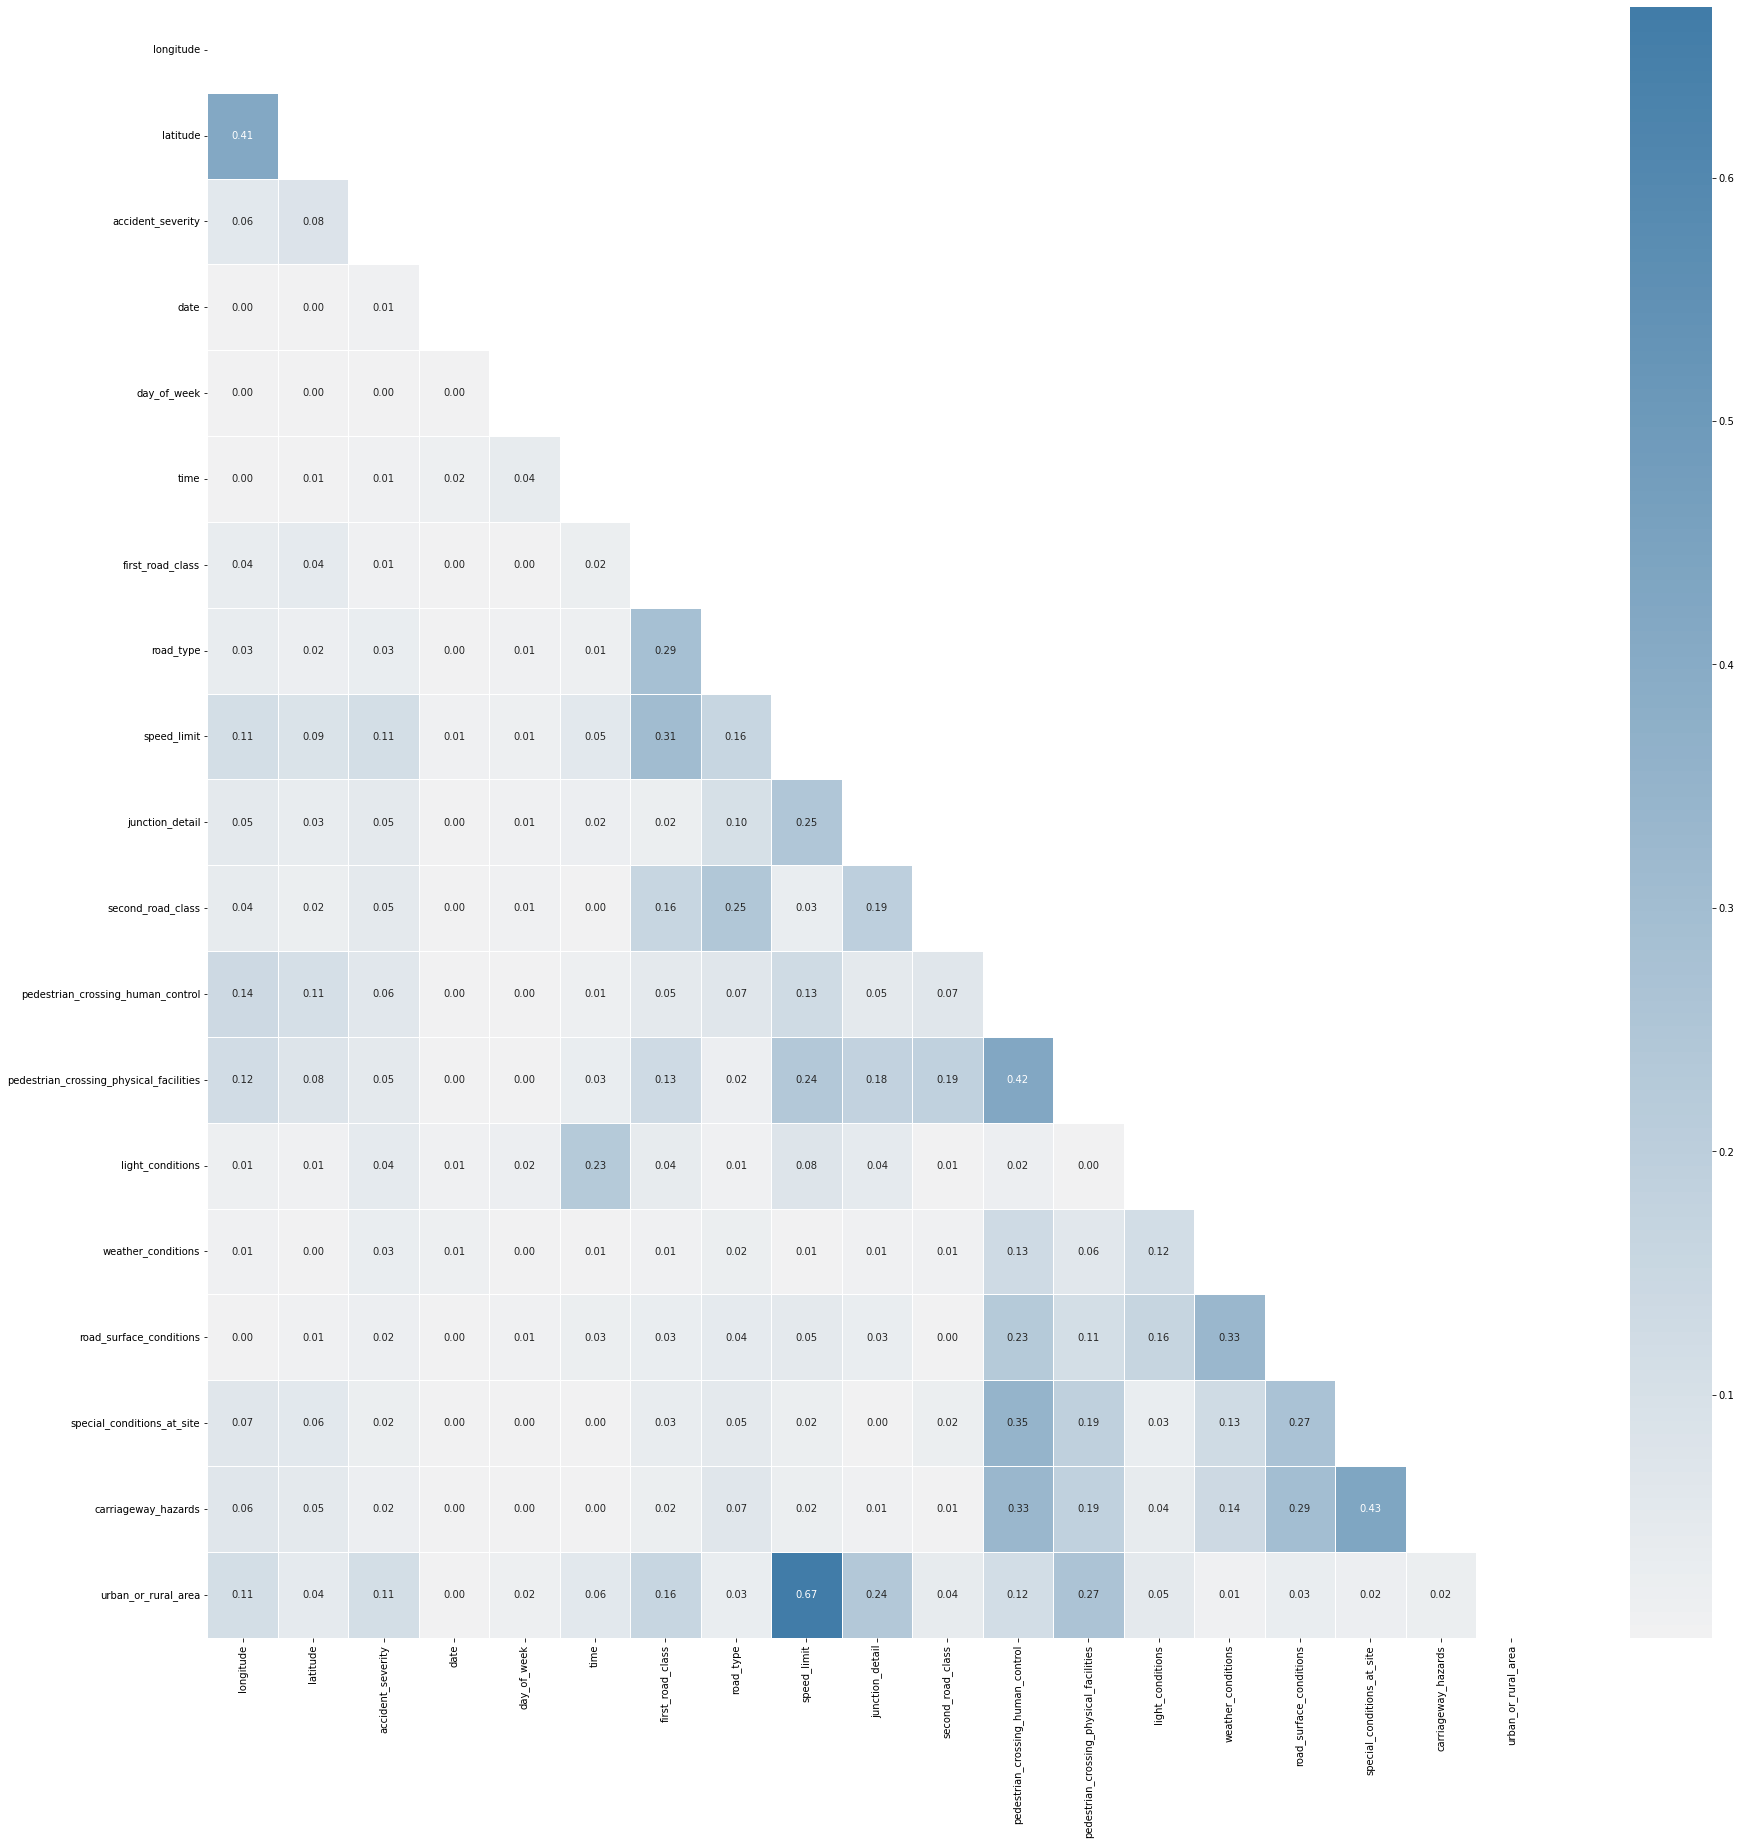

In [21]:
# Visualizing the correlation matrix
corr = accidents.corr().abs()
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
# Add the mask to the heatmap
f, ax = plt.subplots(figsize=(30, 30))
ax=sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# EDA
1. statistical distribution. since most of variables are categorical variables, there is no need to check there statistical distribution
correlation
2. correlation: it is reasonable to conduct pairplot check for variables, since some variables, such as speed limits, light_condition might be correlated with urban_rural_area

In [ ]:
# Visualizing the correlation matrix
corr = accidents.corr().abs()
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
# Add the mask to the heatmap
f, ax = plt.subplots(figsize=(30, 30))
ax=sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

Relationship between hour/day_of_week/month and accident_severity

#### hour vs. accident_severity

In [25]:
df=pd.DataFrame()
df[['accident_severity','hour']]=accidents[['accident_severity','time']]
date_severity_counts=df.groupby([pd.Grouper(key='hour'),df.accident_severity]).size().reset_index(name='count')

In [28]:
df.groupby(['hour','accident_severity']).count()

Empty DataFrame
Columns: []
Index: [(0, 1), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (4, 1), (4, 2), (4, 3), (5, 1), (5, 2), (5, 3), (6, 1), (6, 2), (6, 3), (7, 1), (7, 2), (7, 3), (8, 1), (8, 2), (8, 3), (9, 1), (9, 2), (9, 3), (10, 1), (10, 2), (10, 3), (11, 1), (11, 2), (11, 3), (12, 1), (12, 2), (12, 3), (13, 1), (13, 2), (13, 3), (14, 1), (14, 2), (14, 3), (15, 1), (15, 2), (15, 3), (16, 1), (16, 2), (16, 3), (17, 1), (17, 2), (17, 3), (18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]

[72 rows x 0 columns]

In [36]:
df[['accident_severity','hour']]=accidents[['accident_severity','time']]
df

,accident_severity,hour
0,3,9
1,3,13
2,3,1
3,2,1
4,3,2
...,...,...
91194,2,14
91195,3,15
91196,2,12
91197,3,14


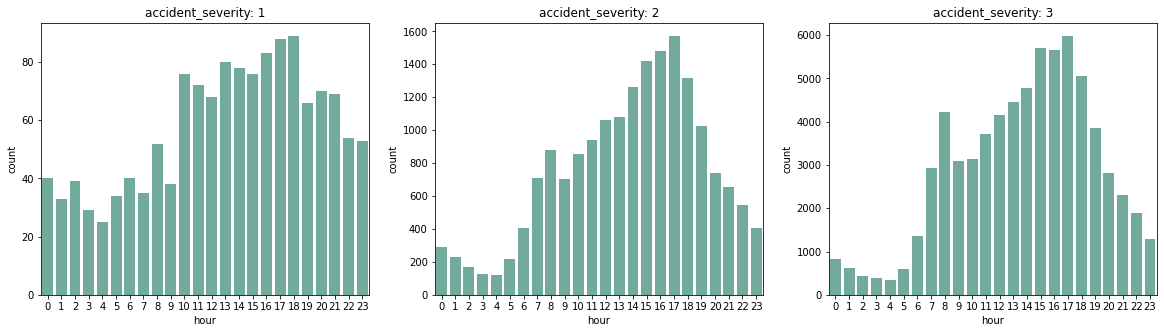

In [38]:
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
for i in range(3):
    sns.countplot(ax=axes[i],x='hour',data=df[df.accident_severity==(i+1)], color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

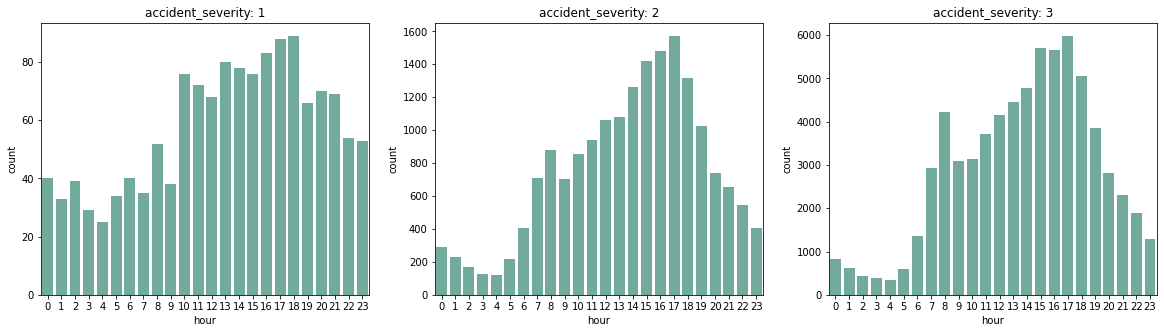

In [19]:
df=pd.DataFrame()
#df['hour']=pd.to_datetime(accidents.time).dt.hour
df[['accident_severity','hour']]=accidents[['accident_severity','time']]
date_severity_counts=df.groupby([pd.Grouper(key='hour'),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x='hour',y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

1. Slight and serious accidents happens the most frequent during rush hour(16-18). This is quite reasonable, sinche people are quite tired and really busy traffic.
2. accidents least likely occur during dawn time, since there are few traffic.
3. Fatal accident showed some drop during dawn, but not as significant as other two accidents. This accident drop due to less traffic might be compensate by low visibility and sleep-deprived driving.

#### day_of_week vs. accident_severity

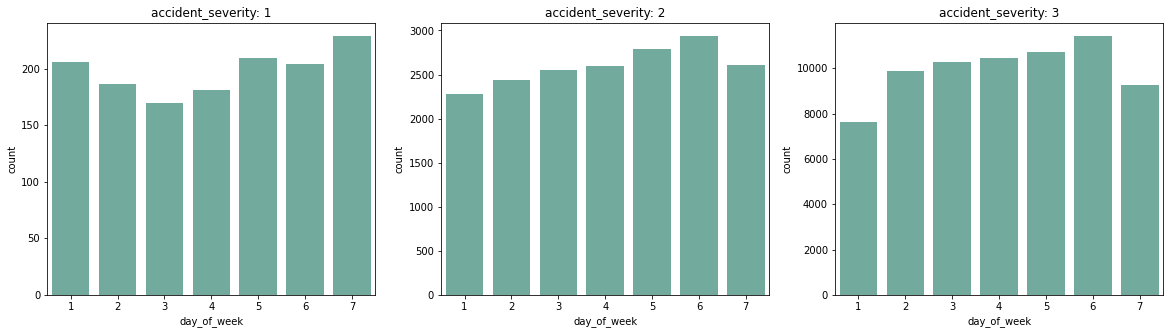

In [22]:
df=pd.DataFrame()
col='day_of_week'
df[['accident_severity',col]]=accidents[['accident_severity','day_of_week']]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

1. Serious and slight accidents again showed similar and reasonable patter: accidents are more frequent during weekend(Friday and Saturday)
2. Fatal accidents are high during weekend, just like the other two, but has the lowest occurance in the middle of the week.

#### month vs. accident_severity

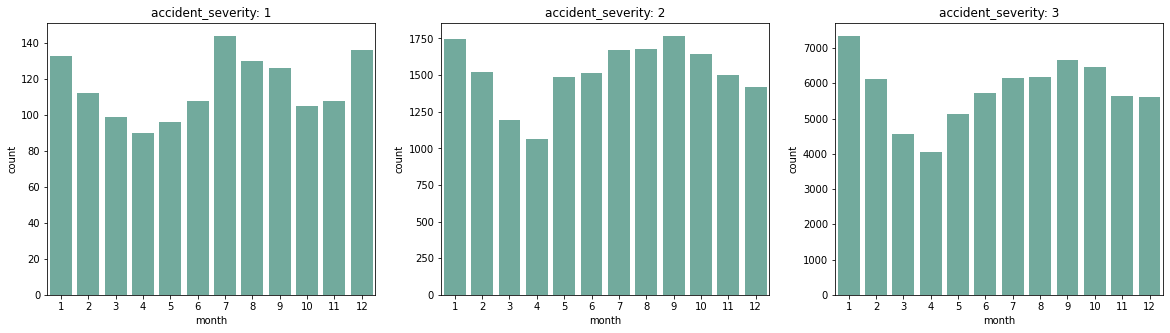

In [21]:
df=pd.DataFrame()
col='month'
df[['accident_severity',col]]=accidents[['accident_severity','date']]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

All level of severities demonstrate a drop near April, this might be related to Covid lockdown.


#### Speed limits

30    51202
60    11363
20    10482
40     7768
70     4665
50     3738
Name: speed_limit, dtype: int64


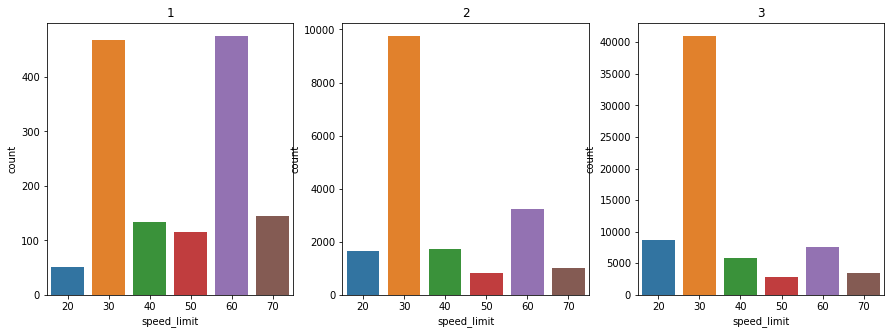

In [23]:
df=pd.DataFrame()
n=accidents.speed_limit.nunique()
print(accidents.speed_limit.value_counts())
df=(accidents.groupby('speed_limit')['accident_severity'].value_counts()).reset_index(name='count')
speed_limits=[20,30,40,50,60,70]
fig,axes=plt.subplots(1,3,sharey=False,figsize=(15,5))

for i in range(3):
    sns.barplot(ax=axes[i],x='speed_limit',y='count',data=df[df.accident_severity==(i+1)])
    axes[i].set_title(i+1)

    speed_limit  accident_severity     count
0            20                  3  0.835814
1            20                  2  0.159225
2            20                  1  0.004961
3            30                  3  0.800437
4            30                  2  0.190442
5            30                  1  0.009121
6            40                  3  0.761843
7            40                  2  0.221035
8            40                  1  0.017122
9            50                  3  0.749331
10           50                  2  0.219636
11           50                  1  0.031033
12           60                  3  0.672710
13           60                  2  0.285488
14           60                  1  0.041802
15           70                  3  0.754984
16           70                  2  0.214148
17           70                  1  0.030868


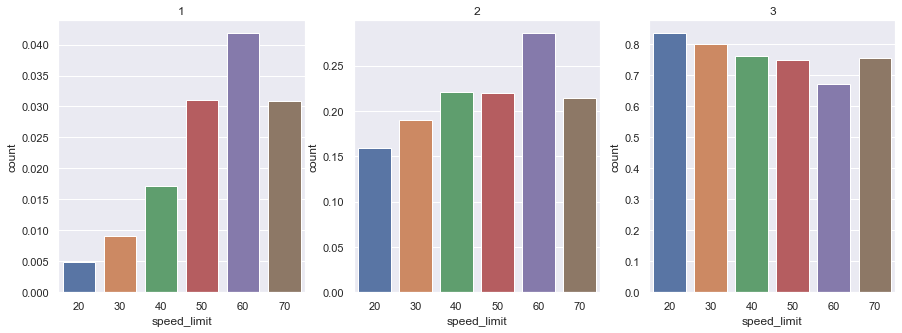

In [49]:
df=pd.DataFrame()
n=accidents.speed_limit.nunique()
df=(accidents.groupby('speed_limit')['accident_severity'].value_counts(normalize=True)).reset_index(name='count')
print(df)
speed_limits=[20,30,40,50,60,70]
fig,axes=plt.subplots(1,3,sharey=False,figsize=(15,5))
for i in range(3):
    sns.barplot(ax=axes[i],x='speed_limit',y='count',data=df[df.accident_severity==(i+1)])
    axes[i].set_title(i+1)

1. All three accidents happend the most at Speed limit 30, this is because most of road is designed with speed limit 30.
2. speed limit 60  

In [ ]:
df=pd.DataFrame()
n=accidents.speed_limit.nunique()
print(accidents.speed_limit.value_counts())
df=(accidents.groupby('speed_limit')['accident_severity'].value_counts()).reset_index(name='count')
speed_limits=[20,30,40,50,60,70]
fig,axes=plt.subplots(1,3,sharey=False,figsize=(15,5))

for i in range(3):
    sns.barplot(ax=axes[i],x='speed_limit',y='count',data=df[df.accident_severity==(i+1)])
    axes[i].set_title(i+1)

Road type

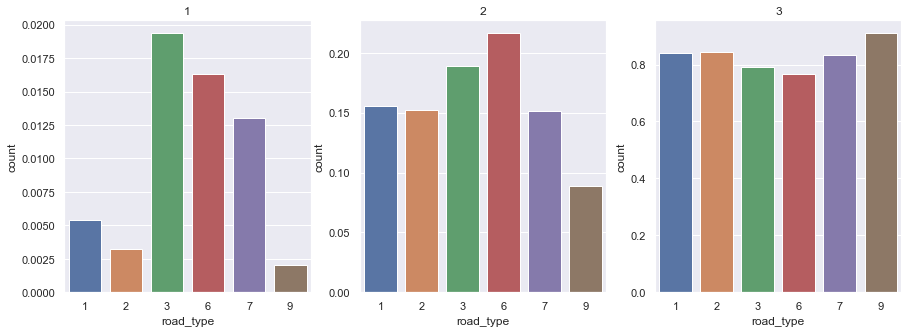

In [39]:
road_type_severity=(accidents.groupby('road_type')['accident_severity'].value_counts(normalize=True)).reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(15,5))
for i in range(3):
    sns.barplot(ax=axes[i],x='road_type',y='count',data=road_type_severity[road_type_severity.accident_severity==(i+1)])
    axes[i].set_title(i+1)

1. for slight accident, road type makes no difference.
2. for fatal and serious accident, type 3, 6, 7 significantly increase accident rate. <br>
Drivers should pay extra attention while driving on type 3(dual carriageway), 6(single carriageway) and 7(slip road) 


#### Light condition

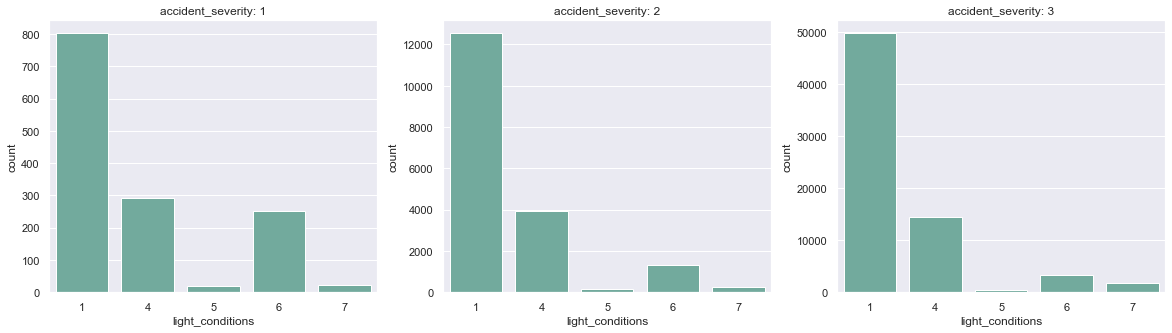

In [41]:
df=pd.DataFrame()
col='light_conditions'
df[['accident_severity',col]]=accidents[['accident_severity',col]]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

weather_conditions

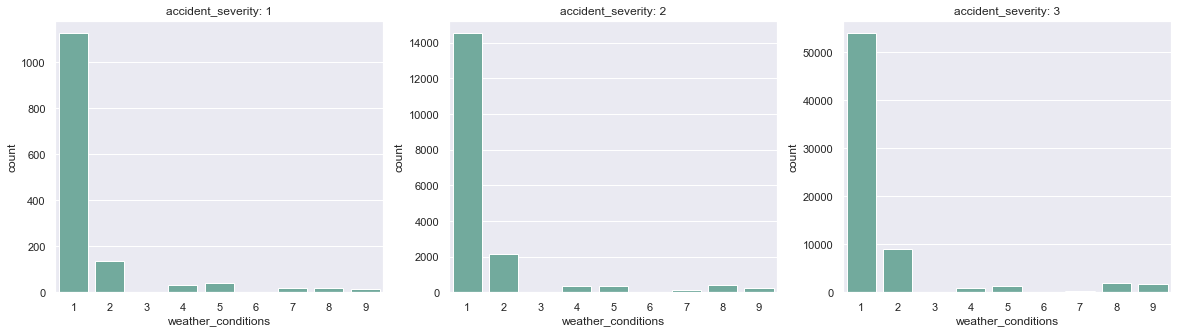

In [42]:
df=pd.DataFrame()
col='weather_conditions'
df[['accident_severity',col]]=accidents[['accident_severity',col]]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

road_surface_conditions

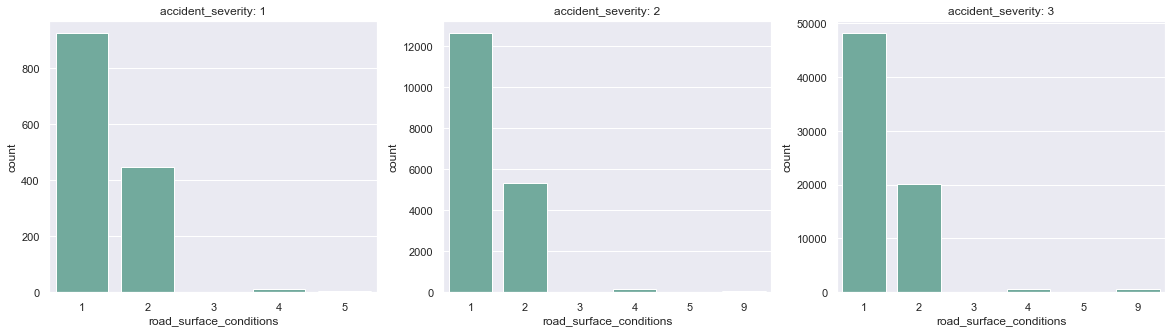

In [43]:
df=pd.DataFrame()
col='road_surface_conditions'
df[['accident_severity',col]]=accidents[['accident_severity',col]]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

special_conditions_at_site

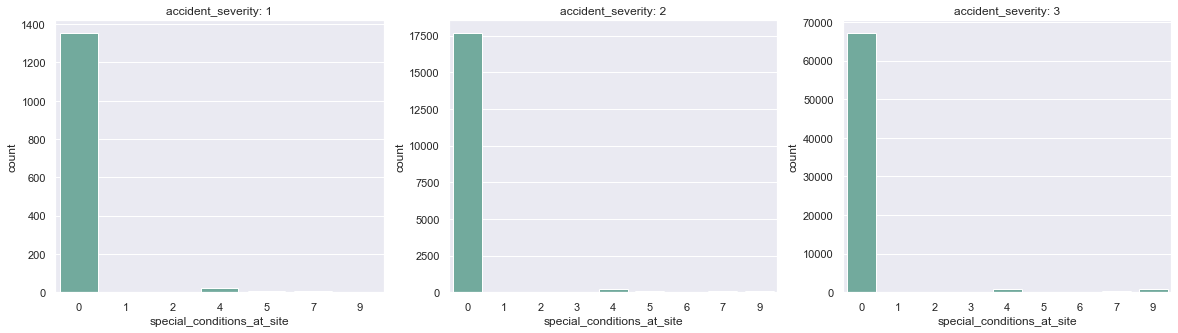

In [44]:
df=pd.DataFrame()
col='special_conditions_at_site'
df[['accident_severity',col]]=accidents[['accident_severity',col]]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

carriageway_hazards

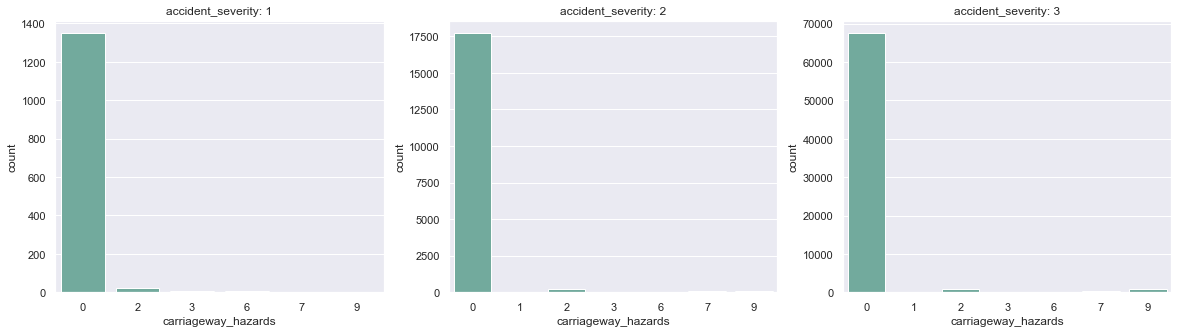

In [45]:
df=pd.DataFrame()
col='carriageway_hazards'
df[['accident_severity',col]]=accidents[['accident_severity',col]]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

urban_or_rural_area

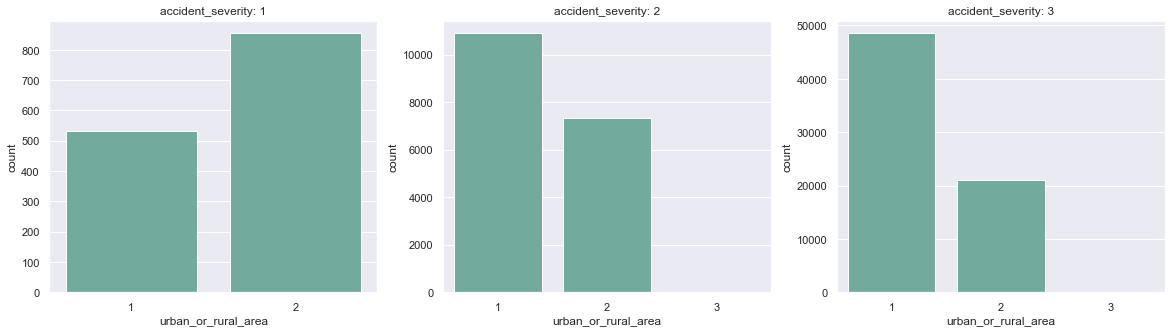

In [46]:
df=pd.DataFrame()
col='urban_or_rural_area'
df[['accident_severity',col]]=accidents[['accident_severity',col]]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(f"accident_severity: {i+1}")

Location

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

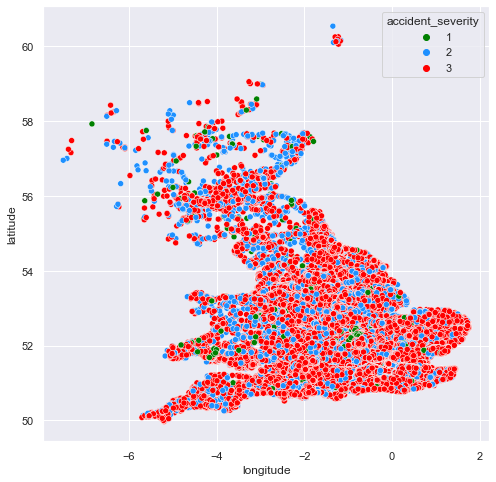

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(y=accidents.latitude,x=accidents.longitude,
                hue=accidents.accident_severity,palette=['green','dodgerblue','red'], legend='full')